In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [21]:
alex = pd.read_excel(r"C:/Users/acer/Downloads/Covid_19_Dataset.xlsx")

In [22]:
alex

,id,reporting date,location,country,country code,Sex,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered
0,1,1/20/2020,"Shenzhen, Guangdong",China,1,male,66.0,2020-03-01 00:00:00,0.0,2020-11-01 00:00:00,12/29/2019,2020-04-01 00:00:00,1,0.0,0,0
1,2,1/20/2020,Shanghai,China,1,female,56.0,1/15/2020,0.0,1/15/2020,NaN,2020-12-01 00:00:00,0,1.0,0,0
2,3,1/21/2020,Zhejiang,China,1,male,46.0,2020-04-01 00:00:00,0.0,1/17/2020,NaN,2020-03-01 00:00:00,0,1.0,0,0
3,4,1/21/2020,Tianjin,China,1,female,60.0,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0
4,5,1/21/2020,Tianjin,China,1,male,58.0,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,802,2/22/2020,Thailand,Thailand,8,female,96.0,2/13/2020,0.0,2/22/2020,NaN,NaN,0,0.0,0,0
802,803,2/23/2020,Thailand,Thailand,8,male,68.0,2/20/2020,0.0,2/22/2020,1/25/2020,2/20/2020,0,0.0,0,0
803,804,2/23/2020,Thailand,Thailand,8,male,62.0,2020-10-02 00:00:00,0.0,2/22/2020,NaN,NaN,0,0.0,0,0
804,805,2/23/2020,Thailand,Thailand,8,female,80.0,2020-08-02 00:00:00,0.0,2/22/2020,NaN,NaN,0,0.0,0,0


In [23]:
alex.head()

,id,reporting date,location,country,country code,Sex,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered
0,1,1/20/2020,"Shenzhen, Guangdong",China,1,male,66.0,2020-03-01 00:00:00,0.0,2020-11-01 00:00:00,12/29/2019,2020-04-01 00:00:00,1,0.0,0,0
1,2,1/20/2020,Shanghai,China,1,female,56.0,1/15/2020,0.0,1/15/2020,NaN,2020-12-01 00:00:00,0,1.0,0,0
2,3,1/21/2020,Zhejiang,China,1,male,46.0,2020-04-01 00:00:00,0.0,1/17/2020,NaN,2020-03-01 00:00:00,0,1.0,0,0
3,4,1/21/2020,Tianjin,China,1,female,60.0,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0
4,5,1/21/2020,Tianjin,China,1,male,58.0,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0


In [24]:
Sex = LabelEncoder()
alex['Sex'] = Sex.fit_transform(alex['Sex'])

In [25]:
alex.tail()

,id,reporting date,location,country,country code,Sex,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered
801,802,2/22/2020,Thailand,Thailand,8,0,96.0,2/13/2020,0.0,2/22/2020,NaN,NaN,0,0.0,0,0
802,803,2/23/2020,Thailand,Thailand,8,1,68.0,2/20/2020,0.0,2/22/2020,1/25/2020,2/20/2020,0,0.0,0,0
803,804,2/23/2020,Thailand,Thailand,8,1,62.0,2020-10-02 00:00:00,0.0,2/22/2020,NaN,NaN,0,0.0,0,0
804,805,2/23/2020,Thailand,Thailand,8,0,80.0,2020-08-02 00:00:00,0.0,2/22/2020,NaN,NaN,0,0.0,0,0
805,806,2/23/2020,Thailand,Thailand,8,0,76.0,2/13/2020,0.0,2/22/20,NaN,NaN,0,0.0,0,0


In [26]:
alex.describe()

,id,country code,Sex,age,If_onset_approximated,visiting Wuhan,from Wuhan
count,806.000000,806.000000,806.000000,722.000000,508.000000,806.000000,802.000000
mean,403.500000,4.518610,0.579404,50.513158,0.033465,0.181141,0.168329
std,232.816451,2.296425,0.493961,18.231830,0.180024,0.385374,0.374392
min,1.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,202.250000,3.000000,0.000000,36.000000,0.000000,0.000000,0.000000
50%,403.500000,5.000000,1.000000,53.000000,0.000000,0.000000,0.000000
75%,604.750000,7.000000,1.000000,65.000000,0.000000,0.000000,0.000000
max,806.000000,8.000000,1.000000,96.000000,1.000000,1.000000,1.000000


In [27]:
alex.columns

Index(['id', 'reporting date', 'location', 'country', 'country code', 'Sex',
       'age', 'symptom_onset', 'If_onset_approximated', 'hosp_visit_date',
       'exposure_start', 'exposure_end', 'visiting Wuhan', 'from Wuhan',
       'death', 'recovered'],
      dtype='object')

In [28]:
alex.head()

,id,reporting date,location,country,country code,Sex,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered
0,1,1/20/2020,"Shenzhen, Guangdong",China,1,1,66.0,2020-03-01 00:00:00,0.0,2020-11-01 00:00:00,12/29/2019,2020-04-01 00:00:00,1,0.0,0,0
1,2,1/20/2020,Shanghai,China,1,0,56.0,1/15/2020,0.0,1/15/2020,NaN,2020-12-01 00:00:00,0,1.0,0,0
2,3,1/21/2020,Zhejiang,China,1,1,46.0,2020-04-01 00:00:00,0.0,1/17/2020,NaN,2020-03-01 00:00:00,0,1.0,0,0
3,4,1/21/2020,Tianjin,China,1,0,60.0,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0
4,5,1/21/2020,Tianjin,China,1,1,58.0,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0


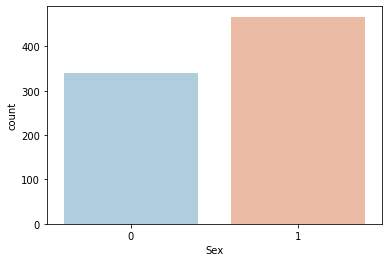

In [29]:
#Gender assigned '1' for Male and '0' for Female

sns.countplot(x="Sex", data=alex.reset_index(), palette="RdBu_r")


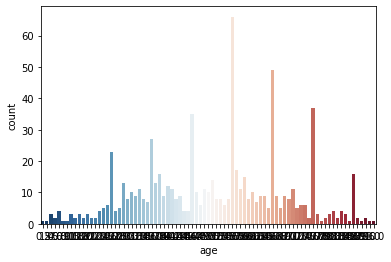

In [30]:
sns.countplot(x="age", data=alex.reset_index(), palette="RdBu_r")

In [31]:
alex

,id,reporting date,location,country,country code,Sex,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered
0,1,1/20/2020,"Shenzhen, Guangdong",China,1,1,66.0,2020-03-01 00:00:00,0.0,2020-11-01 00:00:00,12/29/2019,2020-04-01 00:00:00,1,0.0,0,0
1,2,1/20/2020,Shanghai,China,1,0,56.0,1/15/2020,0.0,1/15/2020,NaN,2020-12-01 00:00:00,0,1.0,0,0
2,3,1/21/2020,Zhejiang,China,1,1,46.0,2020-04-01 00:00:00,0.0,1/17/2020,NaN,2020-03-01 00:00:00,0,1.0,0,0
3,4,1/21/2020,Tianjin,China,1,0,60.0,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0
4,5,1/21/2020,Tianjin,China,1,1,58.0,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,802,2/22/2020,Thailand,Thailand,8,0,96.0,2/13/2020,0.0,2/22/2020,NaN,NaN,0,0.0,0,0
802,803,2/23/2020,Thailand,Thailand,8,1,68.0,2/20/2020,0.0,2/22/2020,1/25/2020,2/20/2020,0,0.0,0,0
803,804,2/23/2020,Thailand,Thailand,8,1,62.0,2020-10-02 00:00:00,0.0,2/22/2020,NaN,NaN,0,0.0,0,0
804,805,2/23/2020,Thailand,Thailand,8,0,80.0,2020-08-02 00:00:00,0.0,2/22/2020,NaN,NaN,0,0.0,0,0


In [32]:
sns.relplot(x="Sex",y="age",alex=alex)

ValueError: Could not interpret input 'Sex'

In [33]:
sns.relplot(x="age",y="country code",alex=alex)

ValueError: Could not interpret input 'age'

In [34]:
alex

,id,reporting date,location,country,country code,Sex,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered
0,1,1/20/2020,"Shenzhen, Guangdong",China,1,1,66.0,2020-03-01 00:00:00,0.0,2020-11-01 00:00:00,12/29/2019,2020-04-01 00:00:00,1,0.0,0,0
1,2,1/20/2020,Shanghai,China,1,0,56.0,1/15/2020,0.0,1/15/2020,NaN,2020-12-01 00:00:00,0,1.0,0,0
2,3,1/21/2020,Zhejiang,China,1,1,46.0,2020-04-01 00:00:00,0.0,1/17/2020,NaN,2020-03-01 00:00:00,0,1.0,0,0
3,4,1/21/2020,Tianjin,China,1,0,60.0,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0
4,5,1/21/2020,Tianjin,China,1,1,58.0,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,802,2/22/2020,Thailand,Thailand,8,0,96.0,2/13/2020,0.0,2/22/2020,NaN,NaN,0,0.0,0,0
802,803,2/23/2020,Thailand,Thailand,8,1,68.0,2/20/2020,0.0,2/22/2020,1/25/2020,2/20/2020,0,0.0,0,0
803,804,2/23/2020,Thailand,Thailand,8,1,62.0,2020-10-02 00:00:00,0.0,2/22/2020,NaN,NaN,0,0.0,0,0
804,805,2/23/2020,Thailand,Thailand,8,0,80.0,2020-08-02 00:00:00,0.0,2/22/2020,NaN,NaN,0,0.0,0,0


In [35]:
bins=(2,12,18,36,45,57,64,73,92)
health=['kid' , 'Youngster' ,'Men' ,'Adult', 'Matured', 'Older','Much older','Crossed limit']
alex['age'] = pd.cut(alex['age'] , bins=bins, labels = health)
# 1-11 = Kid ; 12-22 = Teenage ; 23-33 = Youngster ; 34-44 = Men ; 45-55 = Adult ; 56-66 = Matured ; 67-77 = Older ; 78-88 = Much Older ; Above 89 = NAN


In [36]:
alex['age']

0         Much older
1            Matured
2            Matured
3              Older
4              Older
           ...      
801              NaN
802       Much older
803            Older
804    Crossed limit
805    Crossed limit
Name: age, Length: 806, dtype: category
Categories (8, object): [kid < Youngster < Men < Adult < Matured < Older < Much older < Crossed limit]

In [37]:
alex['age'].value_counts()

Matured          175
Men              160
Much older       108
Adult            108
Crossed limit     84
Older             63
kid               13
Youngster          5
Name: age, dtype: int64

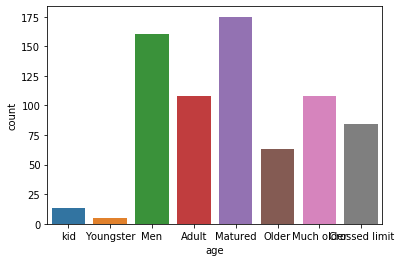

In [38]:
sns.countplot(alex['age'])

In [96]:
alex

,id,reporting date,location,country,Sex,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered
0,1,1/20/2020,"Shenzhen, Guangdong",China,1,Much older,2020-03-01 00:00:00,0.0,2020-11-01 00:00:00,12/29/2019,2020-04-01 00:00:00,1,0.0,0,0
1,2,1/20/2020,Shanghai,China,0,Matured,1/15/2020,0.0,1/15/2020,NaN,2020-12-01 00:00:00,0,1.0,0,0
2,3,1/21/2020,Zhejiang,China,1,Matured,2020-04-01 00:00:00,0.0,1/17/2020,NaN,2020-03-01 00:00:00,0,1.0,0,0
3,4,1/21/2020,Tianjin,China,0,Older,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0
4,5,1/21/2020,Tianjin,China,1,Older,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,802,2/22/2020,Thailand,Thailand,0,NaN,2/13/2020,0.0,2/22/2020,NaN,NaN,0,0.0,0,0
802,803,2/23/2020,Thailand,Thailand,1,Much older,2/20/2020,0.0,2/22/2020,1/25/2020,2/20/2020,0,0.0,0,0
803,804,2/23/2020,Thailand,Thailand,1,Older,2020-10-02 00:00:00,0.0,2/22/2020,NaN,NaN,0,0.0,0,0
804,805,2/23/2020,Thailand,Thailand,0,Crossed limit,2020-08-02 00:00:00,0.0,2/22/2020,NaN,NaN,0,0.0,0,0


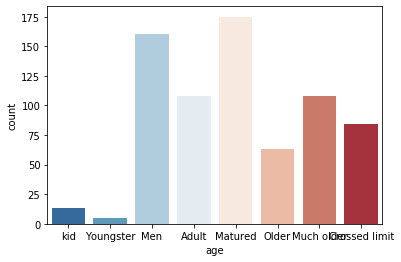

In [97]:
sns.countplot(x="age", data=alex.reset_index(), palette="RdBu_r")

In [98]:
sns.relplot(x="age",y="id",alex=alex)

ValueError: Could not interpret input 'age'

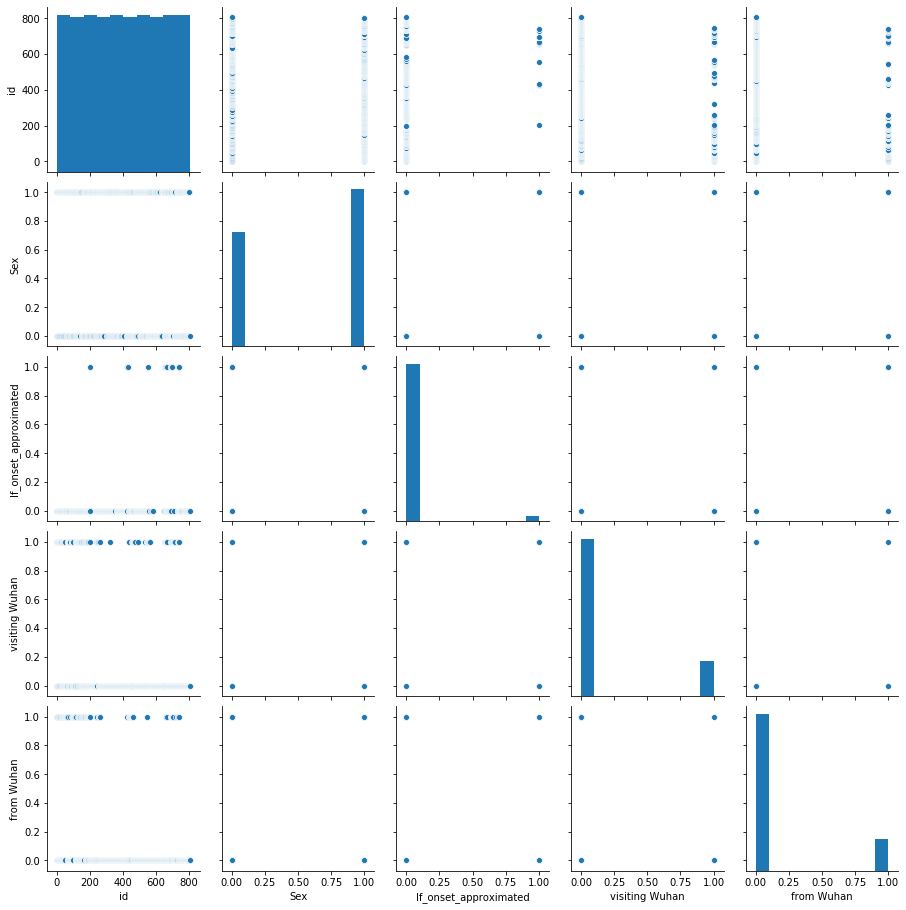

In [99]:
sns.pairplot(alex) 

In [100]:
x = alex.drop('age', axis=1)
y = alex['age']

In [101]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size =0.2 , random_state=0)

In [102]:
s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

ValueError: could not convert string to float: '1/22/2020'

In [103]:
from sklearn import svm

clf = svm.SVC()
clf.fit(x_train, y_train)
pred= clf.predict(x_test)

ValueError: could not convert string to float: 'Malaysia'

In [104]:
print(classification_report(y_test, pred))

NameError: name 'classification_report' is not defined

In [105]:
print(confusion_matrix(y_test, pred))

NameError: name 'confusion_matrix' is not defined

In [106]:
from sklearn import metrics
print(accuracy_score(y_test, pred))

NameError: name 'accuracy_score' is not defined

In [107]:
print(precision_score(y_test, pred))

NameError: name 'precision_score' is not defined

In [73]:

print(recall_score(y_test, pred))

NameError: name 'recall_score' is not defined